In [227]:
import json
import pandas as pd
import numpy as np
import requests

In [448]:
API_list=[]
API_list.append("https://public.enigma.com/api/snapshots/66f2b219-c150-46da-a3d0-079405f6f2cd?&query_mode=advanced&query=(JFK)&row_limit=10000&row_offset=0")
API_list.append("https://public.enigma.com/api/snapshots/ab780727-befe-4680-a84e-71da55158eec?&query_mode=advanced&query=(JFK)&row_limit=10000&row_offset=0")
API_list.append("https://public.enigma.com/api/snapshots/91115dd5-d4d0-4dba-b965-933d043b81cb?&query_mode=advanced&query=(JFK)&row_limit=10000&row_offset=0")
API_list.append("https://public.enigma.com/api/snapshots/61152bab-16b4-4a6f-a91d-39c1f72643e4?&query_mode=advanced&query=(JFK)&row_limit=10000&row_offset=0")
API_list.append("https://public.enigma.com/api/snapshots/e439235b-9a24-40df-84b8-c4c887d1eff0?&query_mode=advanced&query=(JFK)&row_limit=10000&row_offset=0")

In [449]:
def getrequest():
    data=[]
    for i in range(5):
        response = requests.get(API_list[i])
        ontime = dataframe(response)
        data.append(ontime)
    return data

In [ ]:
data = getrequest()

In [442]:
 response = requests.get(API_list[0])

In [447]:
test = json.loads(response.content)
test

{'id': 'index_out_of_bounds',
 'message': 'Explore only supports interactive mode on up to 10k entities'}

In [305]:
def getflight(flight_num, year = None):
    frame_departure =[]
    frame_arrival = []
    if year is None:
        for i in range(5):
            departure,arrival = JFK(data[0])
            flight_dep = departure.loc[departure['flightnum']==flight_num]
            flight_arr = arrival.loc[arrival['flightnum']==flight_num]
            frame_departure.append(flight_dep)
            frame_arrival.append(flight_arr)
        result_dep = pd.concat(frame_departure)
        result_arr = pd.concat(frame_arrival)
        return result_dep,result_arr          
    else:
        departure,arrival = JFK(data[year%2008])
        flight_dep = departure.loc[departure['flightnum']==flight_num]
        flight_arr = arrival.loc[arrival['flightnum']==flight_num]
        return flight_dep,flight_arr

In [228]:
def dataframe(response):
    name = json.loads(response.content)
    cols = name['table_rows']['fields']
    rows = name['table_rows']['rows']
    data = pd.DataFrame(rows,columns=cols)
    return data

In [229]:
def JFK(data):
    departure = data.loc[data['origin']=='JFK']
    arrival = data.loc[data['dest']=='JFK']
    return departure,arrival

31


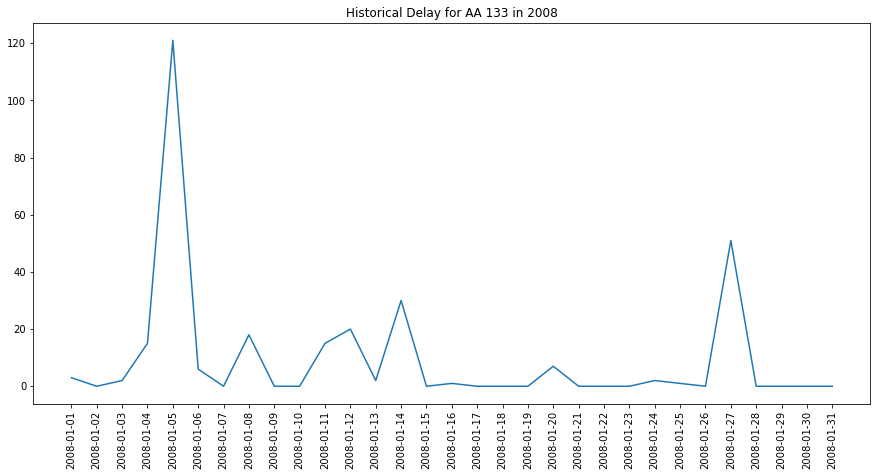

In [430]:
departure, arrival = JFK(data[0])
dep_temp = departure.loc[(departure['flightnum']=='133') &(departure['carrier']=='AA')]
print(len(dep_temp))
dep_delay = dep_temp['depdelayminutes'].tolist()
dep_date = dep_temp['flightdate'].tolist()
x = [x[0:10] for x in dep_date]
x_time = range(len(dep_date))
plt.figure(figsize=(15,7))
plt.plot(x_time,dep_delay)
plt.title('Historical Delay for AA 133 in 2008')
plt.xticks(x_time, x)
plt.xticks(rotation=90)
plt.show()
##
departure_test = dep_delay
departure_time = x


30


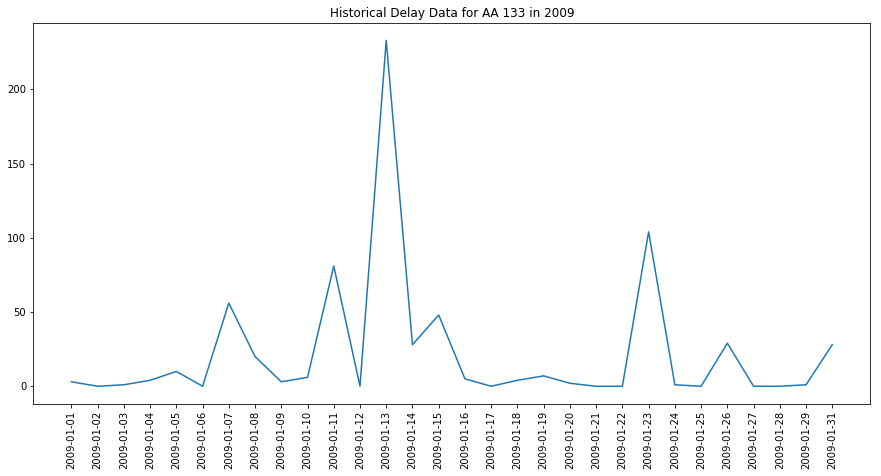

In [431]:
departure, arrival = JFK(data[1])
dep_temp = departure.loc[(departure['flightnum']=='133')&(departure['carrier']=='AA')]
print(len(dep_temp))
dep_delay = dep_temp['depdelayminutes'].tolist()
dep_date = dep_temp['flightdate'].tolist()
x = [x[0:10] for x in dep_date]
x_time = range(len(dep_date))
plt.figure(figsize=(15,7))
plt.plot(x_time,dep_delay)
plt.title('Historical Delay Data for AA 133 in 2009')
plt.xticks(x_time, x)
plt.xticks(rotation=90)
plt.show()
departure_test+= dep_delay
departure_time+=x

31


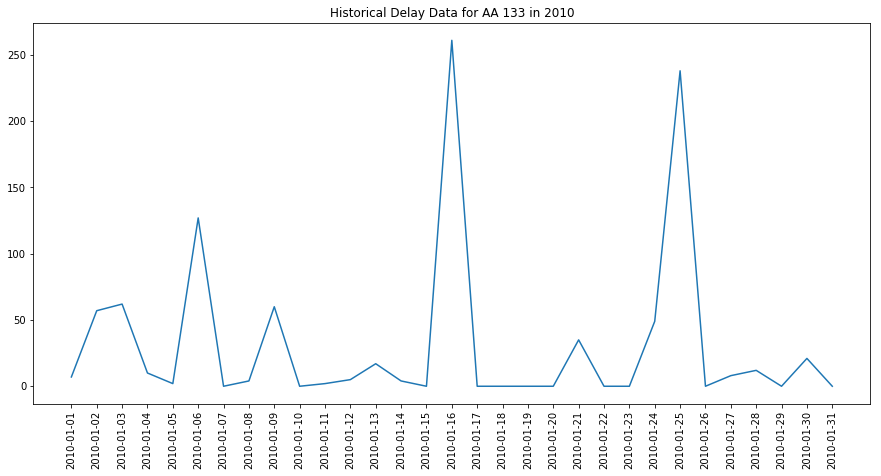

In [432]:
departure, arrival = JFK(data[2])
dep_temp = departure.loc[(departure['flightnum']=='133') &(departure['carrier']=='AA')]
print(len(dep_temp))
dep_delay = dep_temp['depdelayminutes'].tolist()
dep_date = dep_temp['flightdate'].tolist()
x = [x[0:10] for x in dep_date]
x_time = range(len(dep_date))
plt.figure(figsize=(15,7))
plt.plot(x_time,dep_delay)
plt.title('Historical Delay Data for AA 133 in 2010')
plt.xticks(x_time, x)
plt.xticks(rotation=90)
plt.show()
departure_test+= dep_delay
departure_time+=x

31


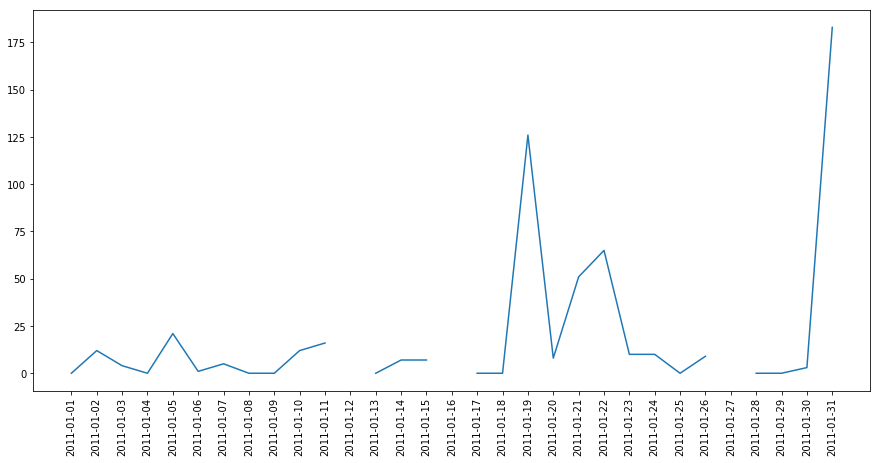

In [428]:
departure, arrival = JFK(data[3])
dep_temp = departure.loc[(departure['flightnum']=='133')&(departure['carrier']=='AA')]
print(len(dep_temp))
dep_delay = dep_temp['depdelayminutes'].tolist()
dep_date = dep_temp['flightdate'].tolist()
x = [x[0:10] for x in dep_date]
x_time = range(len(dep_date))
plt.figure(figsize=(15,7))
plt.plot(x_time,dep_delay)
plt.xticks(x_time, x)
plt.xticks(rotation=90)
plt.show()
departure_test+= dep_delay
departure_time+=x

72


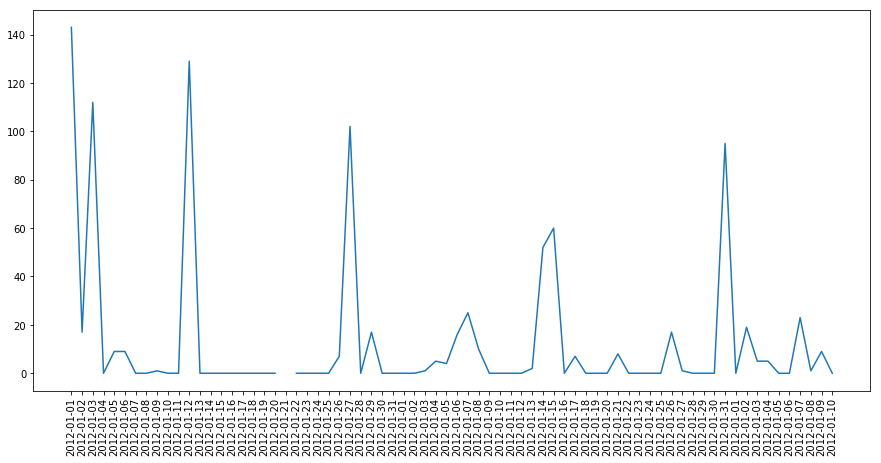

In [418]:
departure, arrival = JFK(data[4])
dep_temp = departure.loc[departure['flightnum']=='133']
print(len(dep_temp))
dep_delay = dep_temp['depdelayminutes'].tolist()
dep_date = dep_temp['flightdate'].tolist()
x = [x[0:10] for x in dep_date]
x_time = range(len(dep_date))
plt.figure(figsize=(15,7))
plt.plot(x_time,dep_delay)
plt.xticks(x_time, x)
plt.xticks(rotation=90)
plt.show()
departure_test+= dep_delay
departure_time+=x

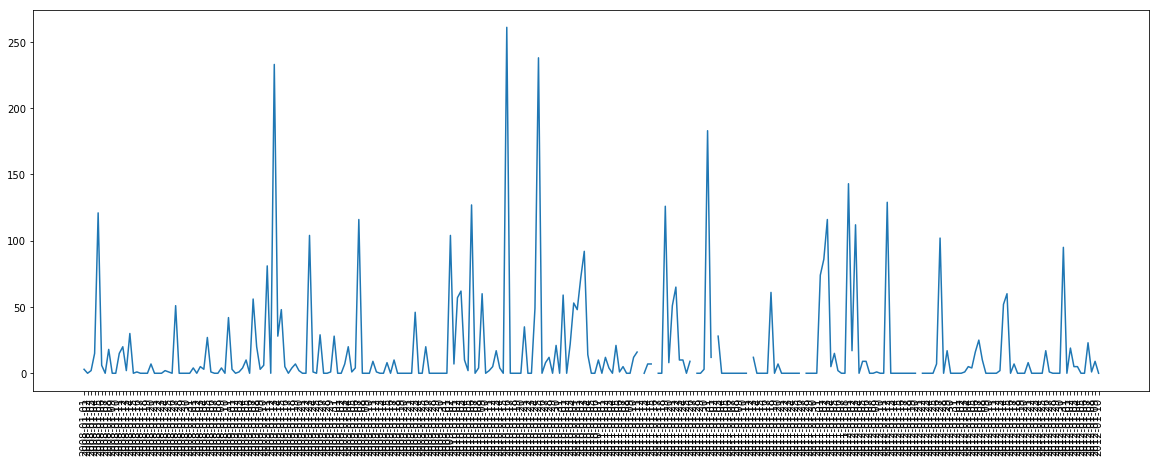

289


In [419]:
x_time = range(len(departure_time))
plt.figure(figsize=(20,7))
plt.plot(x_time,departure_test)
plt.xticks(x_time, departure_time)
plt.xticks(rotation=90)
plt.show()
print(len(departure_time))

In [353]:
departure_f1,arrival_f1 = getflight('133')
f1 = departure_f1['depdelayminutes'].tolist()
f1 = [int(float(x)) for x in f1]
departure_f2,arrival_f2 = getflight('117')
f2 = departure_f2['depdelayminutes'].tolist()
f2 = [int(float(x)) for x in f2]
departure_f3,arrival_f3 = getflight('181')
f3 = departure_f3['depdelayminutes'].tolist()
f3 = [int(float(x)) for x in f3]

In [415]:
len(f1)

210

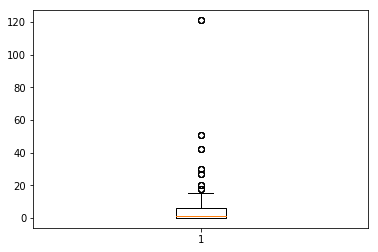

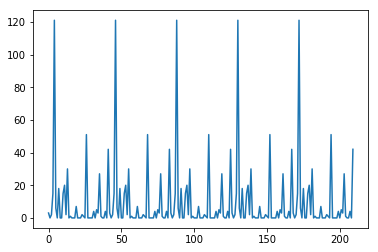

In [371]:
plt.boxplot(f1)
plt.show()
plt.plot(f1)
plt.show()

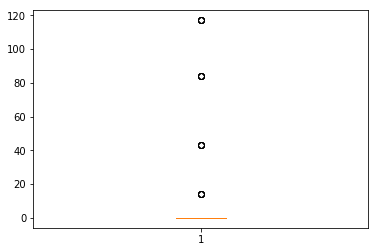

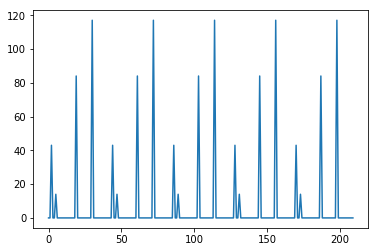

In [372]:
plt.boxplot(f2)
plt.show()
plt.plot(f2)
plt.show()

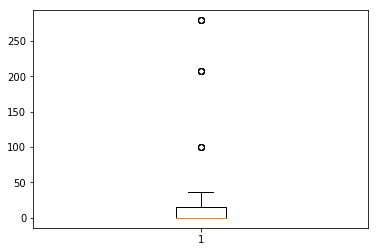

In [356]:
plt.boxplot(f3)
plt.show()